### Python Reader For Netcdf files with Subsection Visualization in (Netcdf, Tiff) Formats
#### Ahad Momin (ahadmomin16@gmail.com)
##### [GitHub](https://github.com/AhadMomin) | [Website](http://ahadmomin.github.io) |
#### Supervisor: Christoph Arns & Masa Prodanovic
#### Digital Rock Petrophysics

The python reader will read the netcdf file and the image arrays will be extracted stored in Tiff format (IMGAGE J). The arrays can also be vizualized in Python as well as Ncview for Netcdf

The goal of the script is also to subsect the large datasets into smaller files and share it with data developers and researchers through Digital Rock Portal. 

#### Import Required Packages

We will also need some standard packages. These should have been installed with Anaconda 3.

#### Load the required libraries

The following code loads the required libraries.


In [1]:
import netCDF4 as ncdf                    # net cdf format files
import numpy as np                        # data fill in 
import matplotlib.pyplot as plt           # For plotting
import matplotlib.image as im
import os                                 # set working directory, run executables
import tifffile as tiff

#### Set the working directory
The working directory is set to the folder where the data files are stored. Good Practice!

In [2]:
os.chdir("C:/Users/ahadm/Documents/UNSW Research/netcdf data sets/UT/DRP/GRF/GRF_phase")     

#### Read the Netcdf data files

The most current Netcdf data comprises of Groups,Variables,Attributes and Dimensions . All of these needs to be read so we can see understand the data set before we store and create subsections. 

I am using two different data sets here!

In [3]:
data = ncdf.Dataset('block00000001.nc','r')
print(data)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    number_of_files: 8
    voxel_size_xyz: [4.6875 4.6875 4.6875]
    voxel_unit: um
    zdim_range: [209 417]
    zdim_total: 1600
    coordinate_origin_xyz: [0 0 0]
    history_20130820_183613_m72f30_phase: Phase Field
FUNCTION:
      Derive various morphological measures on a combination of segmented    
      files and distance maps, including Minkowski functionals, chord length,
      critical radii, phase fractions, and surface are tensors.
USER: 
      cha110
DATE: 
      20/08/2013, 18:36:13
COMMAND: 
      morph.mpi -nprocs 4 8 8 -NC_deflate 0 -NC_cmode 0 -fv m72f30 -fr m72f30 -nxyz 3200 1600 1600 -oxyz 0 0 0 -nph 2 -mph -1 -phit 1 0 -phie 1 0 -BC_mic 0 -ph_shift 0 -BC_dir 1 -BC_peri F F F -dr 0.5 -bas -phf -voxel_size .0046875 .0046875 .0046875
DIRECTORY: 
      /short/m65/cha110/ICMRM_2013/GRF
PARAMETERS: 
      -------------------------------- Processor layout ---------------------

#### Read Variables in the datasets


In [4]:
for v in data.variables:
    print (v, data.variables[v],data.variables[v].shape)


phase <class 'netCDF4._netCDF4.Variable'>
int8 phase(phase_zdim, phase_ydim, phase_xdim)
    data_description: Phase Field
    valid_range: [1 2]
    missing_value: -127
unlimited dimensions: 
current shape = (209, 1600, 3200)
filling on, default _FillValue of -127 ignored (209, 1600, 3200)


From this sepecific data it looks like its a segmented file where the array of shape (400,400,400) is stored in the variable 'segmented' and in the other data set its 'labels'

#### Read Dimensions in the datasets
see the coordinate System. Corrdinates are flipped in data sets so you want to make sure to understand how the corrdinate system is in the file

In [5]:
for dimobj in data.dimensions.values():
     print(dimobj)

<class 'netCDF4._netCDF4.Dimension'>: name = 'phase_xdim', size = 3200
<class 'netCDF4._netCDF4.Dimension'>: name = 'phase_ydim', size = 1600
<class 'netCDF4._netCDF4.Dimension'>: name = 'phase_zdim', size = 209


#### Read Global Attributes in the datasets

In [6]:
for name in data.ncattrs():
       print("Global attr {} = {}".format(name, getattr(data, name)))

Global attr number_of_files = 8
Global attr voxel_size_xyz = [4.6875 4.6875 4.6875]
Global attr voxel_unit = um
Global attr zdim_range = [209 417]
Global attr zdim_total = 1600
Global attr coordinate_origin_xyz = [0 0 0]
Global attr history_20130820_183613_m72f30_phase = Phase Field
FUNCTION:
      Derive various morphological measures on a combination of segmented    
      files and distance maps, including Minkowski functionals, chord length,
      critical radii, phase fractions, and surface are tensors.
USER: 
      cha110
DATE: 
      20/08/2013, 18:36:13
COMMAND: 
      morph.mpi -nprocs 4 8 8 -NC_deflate 0 -NC_cmode 0 -fv m72f30 -fr m72f30 -nxyz 3200 1600 1600 -oxyz 0 0 0 -nph 2 -mph -1 -phit 1 0 -phie 1 0 -BC_mic 0 -ph_shift 0 -BC_dir 1 -BC_peri F F F -dr 0.5 -bas -phf -voxel_size .0046875 .0046875 .0046875
DIRECTORY: 
      /short/m65/cha110/ICMRM_2013/GRF
PARAMETERS: 
      -------------------------------- Processor layout ---------------------------------
      &PARMS_PROC


#### Create variables to store the arrays from the data set

In [9]:
image= data.variables['phase'][:]
print(image.shape)

(209, 1600, 3200)


#### Visualize the stored arrays (The slices can be saved but Matplotlib only saves in 8bit)

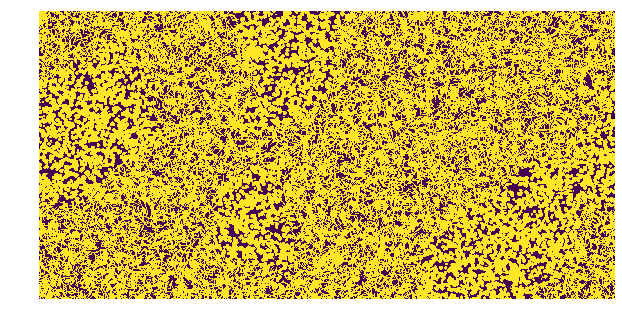

Done!


In [ ]:
#for Variable1_data1
plt.ion()                                
for i in range(1):           #the number in the range can be changed to the length of the z corrdinate  
    plt.cla()                           
    plt.imshow(image[i,:,:])      #cmap='gray',vmin=0,vmax=255
    plt.draw()
    plt.axis('off')
#     plt.savefig('%05d.tiff'%i,bbox_inches='tight',dpi= 1000, quality=95 )
    plt.subplots_adjust(left=0, bottom=0.0, right=2.0, top=1.0, wspace=0.4, hspace=0.3)
    plt.pause(0.05) 
plt.ioff()                              
print('Done!')

#### Save Nc Array into Volumetric Tiff file

In [ ]:
tiff.imwrite('block00000001.tiff', image.astype(np.uint8), compress = 6, imagej=True,
metadata={'Variable': print('Variable:',v),'subsectsize':print('New_Subsect_Shape:',image.shape),'metadata/History': print('datadump/history:',data)})
print(image.dtype)

Variable: phase
New_Subsect_Shape: (209, 1600, 3200)
datadump/history: <class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    number_of_files: 8
    voxel_size_xyz: [4.6875 4.6875 4.6875]
    voxel_unit: um
    zdim_range: [209 417]
    zdim_total: 1600
    coordinate_origin_xyz: [0 0 0]
    history_20130820_183613_m72f30_phase: Phase Field
FUNCTION:
      Derive various morphological measures on a combination of segmented    
      files and distance maps, including Minkowski functionals, chord length,
      critical radii, phase fractions, and surface are tensors.
USER: 
      cha110
DATE: 
      20/08/2013, 18:36:13
COMMAND: 
      morph.mpi -nprocs 4 8 8 -NC_deflate 0 -NC_cmode 0 -fv m72f30 -fr m72f30 -nxyz 3200 1600 1600 -oxyz 0 0 0 -nph 2 -mph -1 -phit 1 0 -phie 1 0 -BC_mic 0 -ph_shift 0 -BC_dir 1 -BC_peri F F F -dr 0.5 -bas -phf -voxel_size .0046875 .0046875 .0046875
DIRECTORY: 
      /short/m65/cha110/ICMRM_2013/GRF
PARAMETERS: 
      

#### Creating Subsections of the data

Input the coordinates of subsection you need.Corrdinates are flipped in data sets so you want to make sure to understand how the corrdinate system is in the file



In [ ]:
New_slice1 = image[:,0:512,:]            # input the z,y,x coordinates

#### Save slices of subsections in Volumetric Tiff

In [ ]:
tiff.imwrite('New_slice1.tiff', New_slice1, imagej=True,
metadata={'Variable': print('Variable:',v),'subsectsize':print('New_Subsect_Shape:',New_slice1.shape),'metadata/History': print('datadump/history:',data)})
print(volume.dtype)

### Creating a Netcdf Format file for the new sliced Array
(File Size Reduced)
A bit tricky but the following steps are taken.
##### Coverting back to Netcdf api have bugs in the python API so restart and run the kernal if you get any error

1)Open/create a netCDF dataset.(create group as well)

2)Define the dimensions of the data.

3)Construct netCDF variables using the defined dimensions.

4)Pass data into the netCDF variables.

5)Add attributes to the variables and dataset (optional but recommended).

6)Close the netCDF dataset.


I am only storing one subsected array (New_slice1) from data1
#### 1)Open/create a netCDF dataset.(create group as well)


In [ ]:
f = ncdf.Dataset('New_Slice1.nc','w', format='NETCDF4')

In [ ]:
drpgrp = f.createGroup('Digital_Rock_Petrophysics')

#### 2)Define the dimensions of the data.
Assign the shapes of the subsected z,y,x cordinates. Make sure not to flip

In [ ]:
drpgrp.createDimension('new_slice_z', New_slice1.shape[0])
drpgrp.createDimension('new_slice_y', New_slice1.shape[1])
drpgrp.createDimension('new_slice_x', New_slice1.shape[2])

#### 3)Construct netCDF variables using the defined dimensions.
'i' for integer
'f' for float
to compress the file turn zlib = 'True'

In [ ]:
Segmented_Subsect01 = drpgrp.createVariable('Segmented_Subsect01', 'f4', ('new_slice_z','new_slice_y','new_slice_x'),zlib=False)

In [ ]:
print(f)
print(f.groups['Digital_Rock_Petrophysics'])

#### 4)Pass data into the netCDF variables.


In [ ]:
Segmented_Subsect01[:] = New_slice1
print(Segmented_Subsect01)

#### 5)Add attributes to the variables and dataset (optional but recommended).
description of the data can be added here

In [ ]:
from datetime import datetime
today = datetime.today()
f.description = "Subsectioned Data"
f.history = "Created " + today.strftime("%d/%m/%y")
f.valid_range: [0,2]
f.FillValue: -127 
#Add local attributes to variable instances
Segmented_Subsect01.units = 'unlimited dimensions'

#### 6)Close the netCDF dataset.
The file is subsection of the file is created

In [ ]:
f.close()

Read the file that you created to double check

In [ ]:
f = ncdf.Dataset('task1.nc','r')
drpgrp = f.groups['Digital_Rock_Petrophysics']

print ("meta data for the dataset:")
print(f)
print ("meta data for the Digital_Rock_Petrophysics group:")
print(drpgrp)
print ("meta data for segmented_subsection01 variable:")
print(drpgrp.variables)

### Netcdf file is successfull created and NCview can be used to visualize the file. Fiji can be used to analyze jpg, png, raw and Tiff formats

Contact Ahad Momin (ahadmomin16@gmail.com) for any help with the code